# Fashion Image Classification using ANN

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.13.0


In [3]:
tf.config.experimental.list_physical_devices() 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [7]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

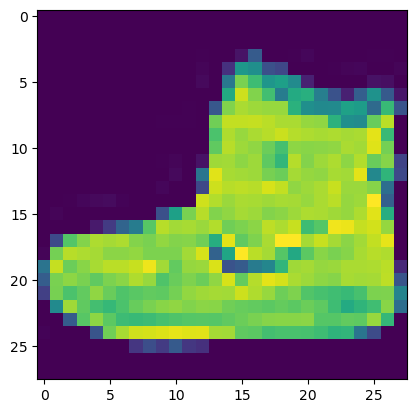

In [9]:
plt.imshow(train_images[0])

In [10]:
train_labels[0]

9

In [11]:
classes[train_labels[0]]

'Ankle Boot'

In [16]:
def plot_show(index):
    plt.figure(figsize=(3,3))
    plt.imshow(train_images[index])
    plt.xlabel(classes[train_labels[index]])
    plt.show()

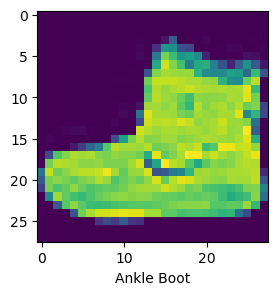

In [17]:
plot_show(0)

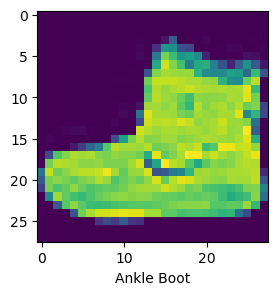

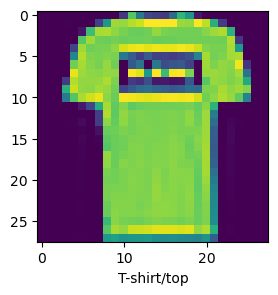

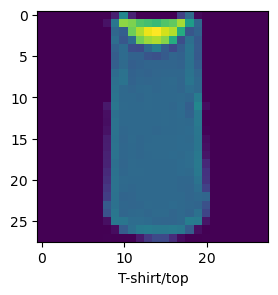

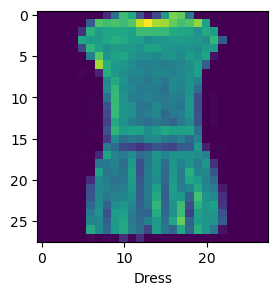

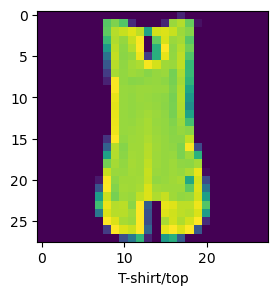

In [19]:
for i in range(5):
    plot_show(i)

In [20]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [23]:
[3]*2

[3, 3]

In [24]:
def get_model(hidden_layers=1):
    # Flatten layer for input
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # hideen layers
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
    # output layer    
    layers.append(keras.layers.Dense(10, activation='sigmoid'))

    model = keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [25]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4760 - accuracy: 0.8307
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3590 - accuracy: 0.8679
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3226 - accuracy: 0.8810
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3001 - accuracy: 0.8895
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2838 - accuracy: 0.8945


In [26]:
model.predict(test_images_scaled)[2]

313/313 [==============================] - 1s 3ms/step


array([1.84707329e-01, 9.99999583e-01, 1.11409325e-04, 5.22647873e-02,
       7.90379103e-03, 5.40715117e-09, 7.32454864e-05, 1.11891677e-13,
       7.23233870e-06, 1.26367883e-09], dtype=float32)

In [27]:
test_labels[2]

1